# Case Study - World Happiness Analysis Project

## Table of Content

1. Importing Libraries
2. Importing Data
3. Elbow Technique
4. K-mean Clustering
5. Grouping


# 01. Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Import the kmeans algorithm from scikit-learn
import pylab as pl #Pylab is a convenience module that bulk imports matplotlib

In [39]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data - 2015 Data

In [40]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [41]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2015 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2015_clean_data.csv'), index_col = False)

In [42]:
df_2015.head()

,Unnamed: 0,Country,Region,happiness_rank_2015,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015
0,0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [43]:
# Drop the redundant columns
df_2015 = df_2015.drop(['Unnamed: 0'],axis = 1)

In [44]:
df_2015.shape

(158, 12)

In [45]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      158 non-null    object 
 1   Region                       158 non-null    object 
 2   happiness_rank_2015          158 non-null    int64  
 3   happiness_score_2015         158 non-null    float64
 4   standard_error_2015          158 non-null    float64
 5   economy_gdp_2015             158 non-null    float64
 6   family_2015                  158 non-null    float64
 7   health_life_expectancy_2015  158 non-null    float64
 8   freedom_2015                 158 non-null    float64
 9   trust_2015                   158 non-null    float64
 10  generosity_2015              158 non-null    float64
 11  dystopia_residual_2015       158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


### Note: Data Wrangling, Subsetting and Consistency Check had been previously carried out in Exercise 6.1

In [46]:
# There are mixed of categorical data and numerical data. Just keep the numerical data in this exercise.
df_2015_clean = df_2015.drop(columns =['Country','Region','happiness_rank_2015'])

In [47]:
df_2015_clean

,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# 03a. Elbow Technique - 2015 Data

In [48]:
# Stating by defining the range of the cluster
num_cl = range(1, 10) 
# Then, defining the k-means cluster in the above range.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [49]:
# Now, create a score for each of the ranges created..
score_2015 = [kmeans[i].fit(df_2015_clean).score(df_2015_clean) for i in range(len(kmeans))] 

In [50]:
score_2015

[-309.08022339838226,
 -132.52104202925418,
 -96.79890634109614,
 -77.21486908829772,
 -62.85707132376508,
 -56.88398081924429,
 -51.5184300436137,
 -47.85380939392991,
 -44.39759611841621]

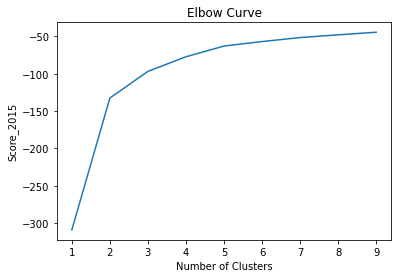

In [51]:
# And finally, create the elbow graph
pl.plot(num_cl,score_2015)
pl.xlabel('Number of Clusters')
pl.ylabel('Score_2015')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, is where the curve begins to flatten out. In this case, we can see that it jumps rapidly from one to two then to three on the x-axis, then rises only slowly after three. That the optimal count for this clusters is just about three. Let's take three clusters in this case.  

# 04a. K-Means Clustering - 2015 Data

In [52]:
# Create the object based on the n° of clusters

kmeans = KMeans(n_clusters = 3) 

In [53]:
# Then fit the K-mean into the DF

kmeans.fit(df_2015_clean)

KMeans(n_clusters=3)

In [54]:
df_2015_clean['clusters'] = kmeans.fit_predict(df_2015_clean)

In [55]:
df_2015_clean.head()

,happiness_score_2015,standard_error_2015,economy_gdp_2015,family_2015,health_life_expectancy_2015,freedom_2015,trust_2015,generosity_2015,dystopia_residual_2015,clusters
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,1
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,1
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,1
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,1


In [56]:
df_2015_clean['clusters'].value_counts()

2    69
0    46
1    43
Name: clusters, dtype: int64

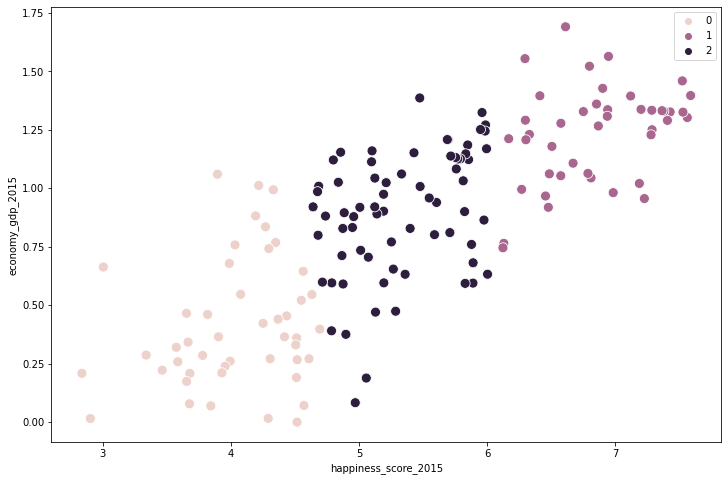

In [57]:
# Plot the clusters for the "happiness_score" and "economy_gdp" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['economy_gdp_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('economy_gdp_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest economy_gdp and lower happiness score; the second cluster (1) has the highest economy gdp and highest happiness score. The third cluster (2) major sat in the middle economy gdp and the happiness score is in middle too. 

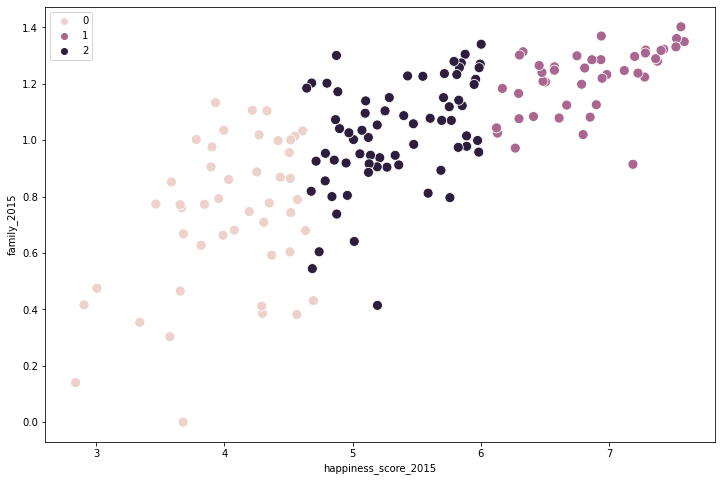

In [58]:
# Plot the clusters for the "happiness_score" and "family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['family_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('family_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest economy_gdp and lower happiness score; the second cluster (1) has the highest economy gdp and highest happiness score. The third cluster (2) major sat in the middle family score and the happiness score is in middle too. 

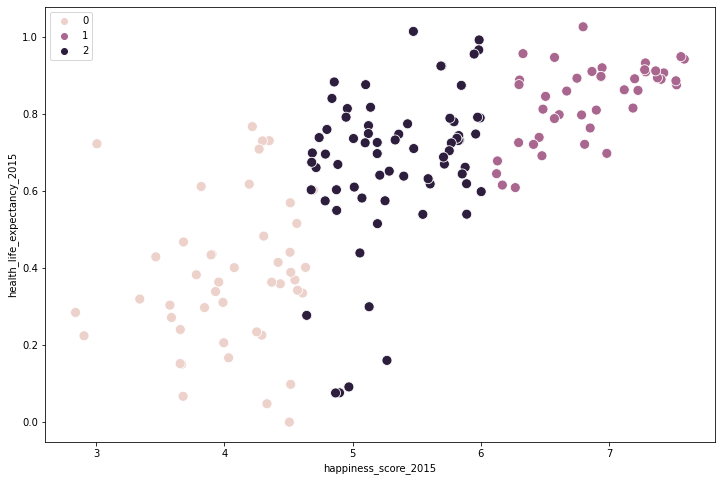

In [59]:
# Plot the clusters for the "happiness_score" and "health_life_expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['health_life_expectancy_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('health_life_expectancy_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest health life expectancy score and lower happiness score; the second cluster (1) has the highest health life expectancy score and highest happiness score. The third cluster (2) major sat in the middle health life expectancy score and the happiness score is in middle too.

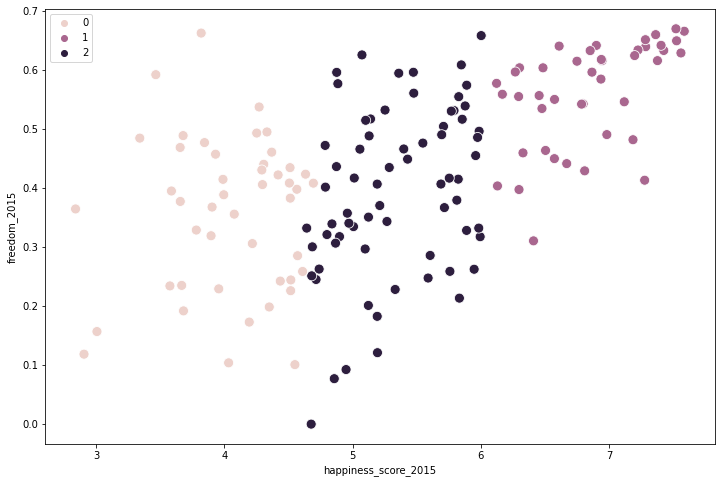

In [60]:
# Plot the clusters for the "happiness_score" and "freedom" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['freedom_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('freedom_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest trust score and lower happiness score; the second cluster (1) has the highest trust score and highest happiness score. The third cluster (2) major sat in the middle trust score and the happiness score is in middle too.

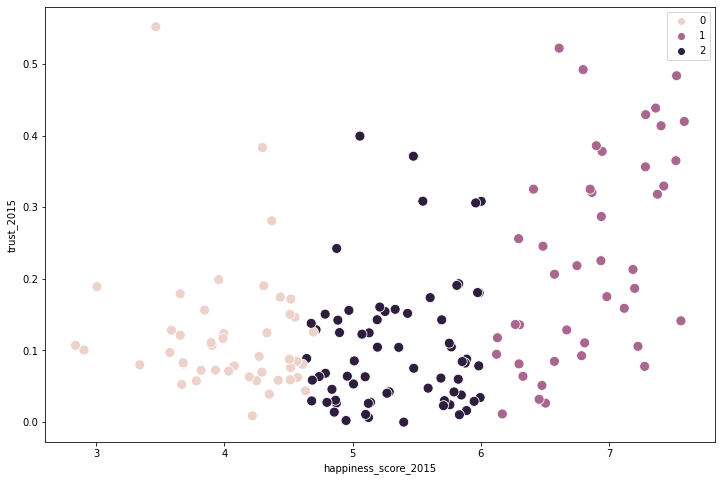

In [61]:
# Plot the clusters for the "happiness_score" and "trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['trust_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('trust_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest trust score and lower happiness score; the second cluster (1) has the highest trust score and highest happiness score. The third cluster (2) major sat in the middle trust score and the happiness score is in middle too.

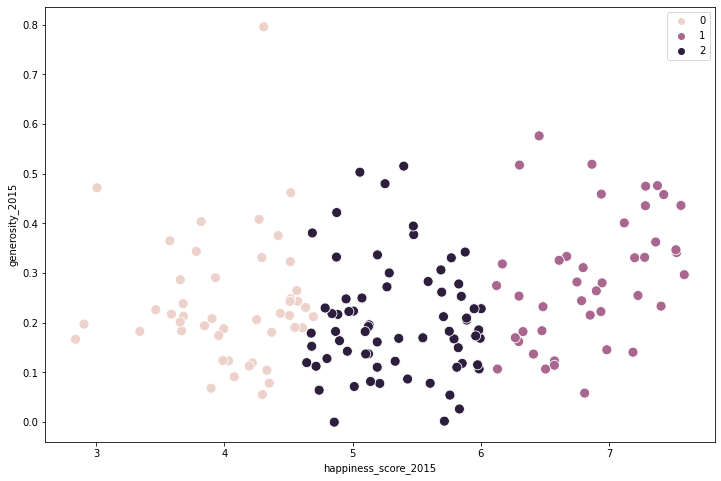

In [62]:
# Plot the clusters for the "happiness_score" and "generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['generosity_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('generosity_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest generosity score and lower happiness score; the second cluster (1) has the highest generosity score and highest happiness score. The third cluster (2) major sat in the middle generosity score and the happiness score is in middle too.

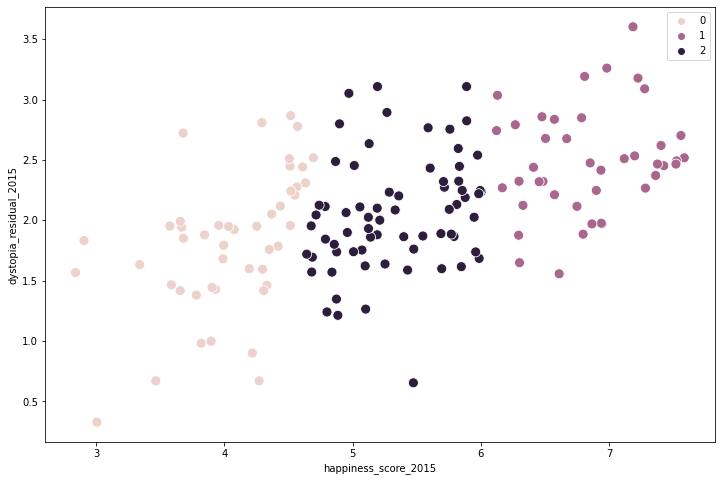

In [63]:
# Plot the clusters for the "happiness_score" and "dystopia_residual" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2015_clean['happiness_score_2015'], y=df_2015_clean['dystopia_residual_2015'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('happiness_score_2015') # Label x-axis.
plt.ylabel('dystopia_residual_2015') # Label y-axis.
plt.show()

The first cluster (0) has the lowest dystopia_residual score and lower happiness score; the second cluster (1) has the highest dystopia_residual score and highest happiness score. The third cluster (2) major sat in the middle dystopia_residual score and the happiness score is in middle too.

# # 05a. Grouping - 2015 Data

In [64]:
df_2015_clean.loc[df_2015_clean['clusters'] == 2, 'cluster'] = 'purple'
df_2015_clean.loc[df_2015_clean['clusters'] == 1, 'cluster'] = 'whitish purple'
df_2015_clean.loc[df_2015_clean['clusters'] == 0, 'cluster'] = 'whitish pink'

In [65]:
df_2015_clean.groupby('clusters').agg({'happiness_score_2015':['mean', 'median'],
                                       'economy_gdp_2015':['mean', 'median'],
                                       'family_2015':['mean', 'median'], 
                         'health_life_expectancy_2015':['mean', 'median'], 
                         'freedom_2015':['mean', 'median'],
                    'trust_2015':['mean', 'median'],
                    'generosity_2015':['mean', 'median'],
                    'dystopia_residual_2015':['mean', 'median']})

happiness_score_2015         economy_gdp_2015          family_2015  \
                         mean  median             mean   median        mean   
clusters                                                                      
0                    4.048000  4.1355         0.412533  0.35095    0.728951   
1                    6.851163  6.8530         1.235628  1.29025    1.218036   
2                    5.341420  5.2680         0.892481  0.91851    1.024319   

                  health_life_expectancy_2015          freedom_2015            \
           median                        mean   median         mean    median   
clusters                                                                        
0         0.77190                    0.376310  0.36303     0.356210  0.385695   
1         1.24711                    0.835686  0.87464     0.561940  0.596250   
2         1.03516                    0.671540  0.70380     0.393798  0.406610   

         trust_2015          generosity_2015           dystopia_residual_2015  \
               mean   median            mean    median                   mean   
clusters                                                                        
0          0.121092  0.09449        0.238513  0.212775               1.814414   
1          0.231836  0.21312        0.289394  0.280340               2.478693   
2          0.103210  0.08242        0.204016  0.182950               2.052050   

                    
            median  
clusters            
0         1.864885  
1         2.465310  
2         2.025180

The cluster 1 has the best stats in almost all categories. The median number of happiness score for this cluster is 6.85, which is significantly larger than the other two. But the dystopia residual for this cluster is high (2.47) compared to the other two cluster. It is contradict to the exercise 6.2 - The highest happiness score country normally has the lowest dystopia residual. 